Project Title: Activity-Based Prediction of Digital Overuse in Youth \
Team Name:AI Enthusiasts \
Team No:28

In [ ]:
#Importing the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/cmi_train.csv')

# Basic data overview
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Columns: 155 entries, Basic_Demos-Enroll_Season to Stat_95
dtypes: float64(143), int64(12)
memory usage: 3.2 MB
None
   Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  CGAS-Season  \
0                          0                5                0            0   
1                          1                9                0            1   
2                          1               10                1            2   
3                          2                9                0            2   
4                          3               13                1            0   

   CGAS-CGAS_Score  Physical-Season  Physical-BMI  Physical-Height  \
0             51.0                0     16.877316             46.0   
1              NaN                0     14.035590             48.0   
2             71.0                0     16.648696             56.5   
3             71.0                1     18.292347     

In [ ]:
# Handling missing values (you can customize this as needed)
data.fillna(data.median(), inplace=True)

# Encoding categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Define feature matrix X and target vector y
X = data.drop(columns=['sii'])
y = data['sii']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# Applying PCA if dimensionality reduction is desired
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f'Number of features after PCA: {X_pca.shape[1]}')

Number of features after PCA: 63


In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


Accuracy: 0.6240875912408759
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.96      0.78       336
         1.0       0.33      0.14      0.19       131
         2.0       0.60      0.04      0.08        72
         3.0       0.00      0.00      0.00         9

    accuracy                           0.62       548
   macro avg       0.40      0.28      0.26       548
weighted avg       0.56      0.62      0.53       548



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


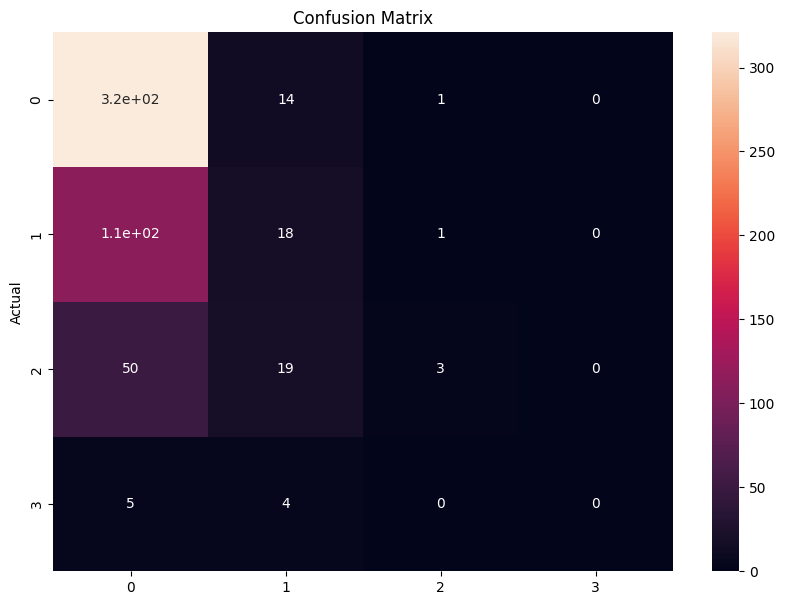

In [ ]:
# Predictions and evaluation
y_pred = best_rf_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True)
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

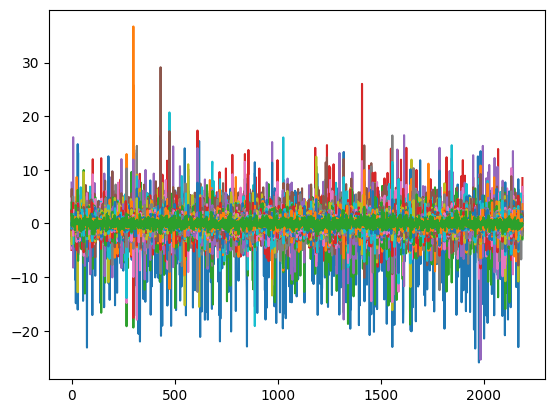

In [ ]:
plt.plot(X_train)

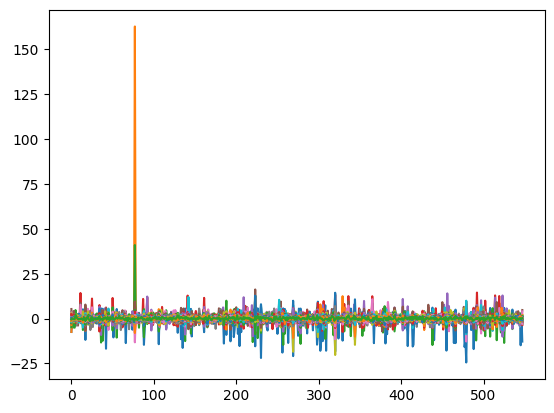

In [ ]:
plt.plot(X_test)

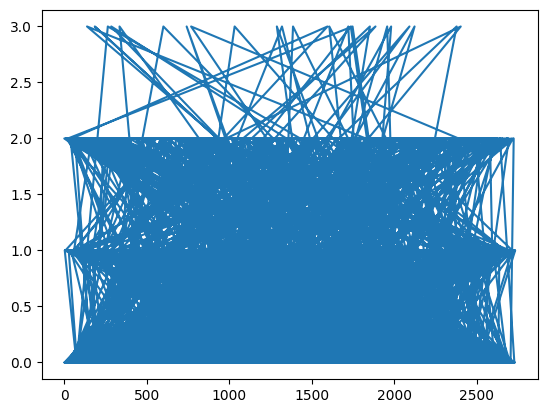

In [ ]:
plt.plot(y_train)

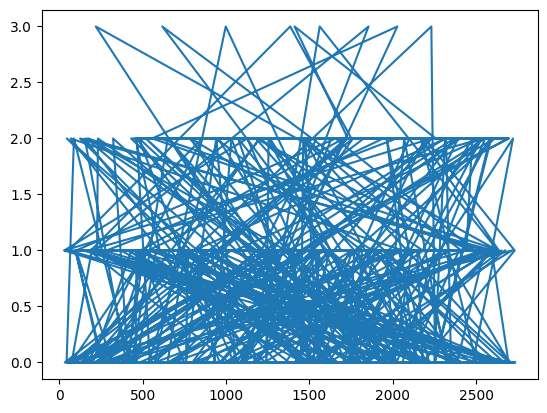

In [ ]:
plt.plot(y_test)